In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('TABASCO_CAMPECHE_fishing_reports.csv', low_memory=False)
# Convertir la fecha a formato datetime y extraer el año
df['FECHA AVISO'] = pd.to_datetime(df['FECHA AVISO'], format='%d/%m/%Y')
df['AÑO'] = df['FECHA AVISO'].dt.year
df['MES'] = df['FECHA AVISO'].dt.month

# Excluir el año 2016
df = df[df['AÑO'] != 2016]

In [3]:
df.columns

Index(['Unnamed: 0', 'CLAVE SITIO DESEMBARQUE', 'NOMBRE SITIO DESEMBARQUE',
       'RNPA UNIDAD ECONOMICA', 'UNIDAD ECONOMICA', 'NOMBRE ESTADO',
       'CLAVE OFICINA', 'NOMBRE OFICINA', 'FOLIO AVISO', 'FECHA AVISO',
       'CLAVE LUGARCAPTURA', 'NOMBRE LUGARCAPTURA', 'NUMERO EMBARCACIONES',
       'YEAR CORTE', 'NOMBRE PRINCIPAL', 'CLAVE ESPECIE', 'NOMBRE ESPECIE',
       'PESO DESEMBARCADO_KILOGRAMOS', 'PRECIO_PESOS', 'LITORAL', 'AÑO',
       'MES'],
      dtype='object')

In [4]:
df['NOMBRE OFICINA'].unique()

array(['CAMPECHE', 'CHAMPOTON', 'ISLA AGUADA', 'PUERTO CEIBA',
       'SEYBAPLAYA', 'SABANCUY', 'EMILIANO ZAPATA', 'CIUDAD DEL CARMEN',
       'FRONTERA', 'ISLA ARENA', 'ATASTA', 'PALIZADA',
       'SANCHEZ MAGALLANEZ', 'VILLA HERMOSA', 'JONUTA', 'MACUSPANA',
       'SANCHEZ MAGALLANES', 'CHILTEPEC BELLOTE'], dtype=object)

In [5]:
df['NOMBRE OFICINA'] = df['NOMBRE OFICINA'].replace('SANCHEZ MAGALLANES', 'SANCHEZ MAGALLANEZ')

In [6]:
# Crear una nueva columna para el valor de la captura
df['Valor (MXN)'] = df['PESO DESEMBARCADO_KILOGRAMOS'] * df['PRECIO_PESOS']

In [7]:
# 1. Identificar el top 10 de NOMBRE PRINCIPAL por su volumen de captura en PESO DESEMBARCADO_KILOGRAMOS
top_10_by_volume = df.groupby('NOMBRE PRINCIPAL')['PESO DESEMBARCADO_KILOGRAMOS'].sum().nlargest(10)
print("Top 10 PRINCIPALs por volumen de captura (PESO DESEMBARCADO_KILOGRAMOS):")
print(top_10_by_volume)

Top 10 PRINCIPALs por volumen de captura (PESO DESEMBARCADO_KILOGRAMOS):
NOMBRE PRINCIPAL
PULPO      55662446.00
JUREL      47794422.01
OSTION     38393232.00
BANDERA    24868791.18
OTRAS      23192687.70
JAIBA      22246346.41
ROBALO     21071184.76
CARACOL    18705362.00
MOJARRA    13079446.00
RUBIO      11070100.57
Name: PESO DESEMBARCADO_KILOGRAMOS, dtype: float64


In [8]:
# 2. Identificar el top 10 de NOMBRE PRINCIPAL por el valor de la captura
top_10_by_value = df.groupby('NOMBRE PRINCIPAL')['Valor (MXN)'].sum().nlargest(10)
print("\nTop 10 PRINCIPALs por valor de la captura:")
print(top_10_by_value)


Top 10 PRINCIPALs por valor de la captura:
NOMBRE PRINCIPAL
PULPO          3.256324e+09
ROBALO         1.552396e+09
OTRAS          7.419531e+08
GUACHINANGO    5.731435e+08
JUREL          4.599397e+08
MOJARRA        4.421928e+08
BANDERA        3.268515e+08
JAIBA          3.200951e+08
CARACOL        2.803318e+08
CAMARON        2.381236e+08
Name: Valor (MXN), dtype: float64


In [9]:
# 3. Identificar la frecuencia con que se reporta cada NOMBRE PRINCIPAL del top 10 por volumen
frequency_top_10_volume = df[df['NOMBRE PRINCIPAL'].isin(top_10_by_volume.index)]['NOMBRE PRINCIPAL'].value_counts()
print("\nFrecuencia con que se reporta cada PRINCIPAL del top 10 por volumen:")
print(frequency_top_10_volume)


Frecuencia con que se reporta cada PRINCIPAL del top 10 por volumen:
NOMBRE PRINCIPAL
JUREL      70568
ROBALO     69010
PULPO      65904
OTRAS      65216
RUBIO      46304
MOJARRA    32155
BANDERA    25655
JAIBA      14541
CARACOL     8612
OSTION      4024
Name: count, dtype: int64


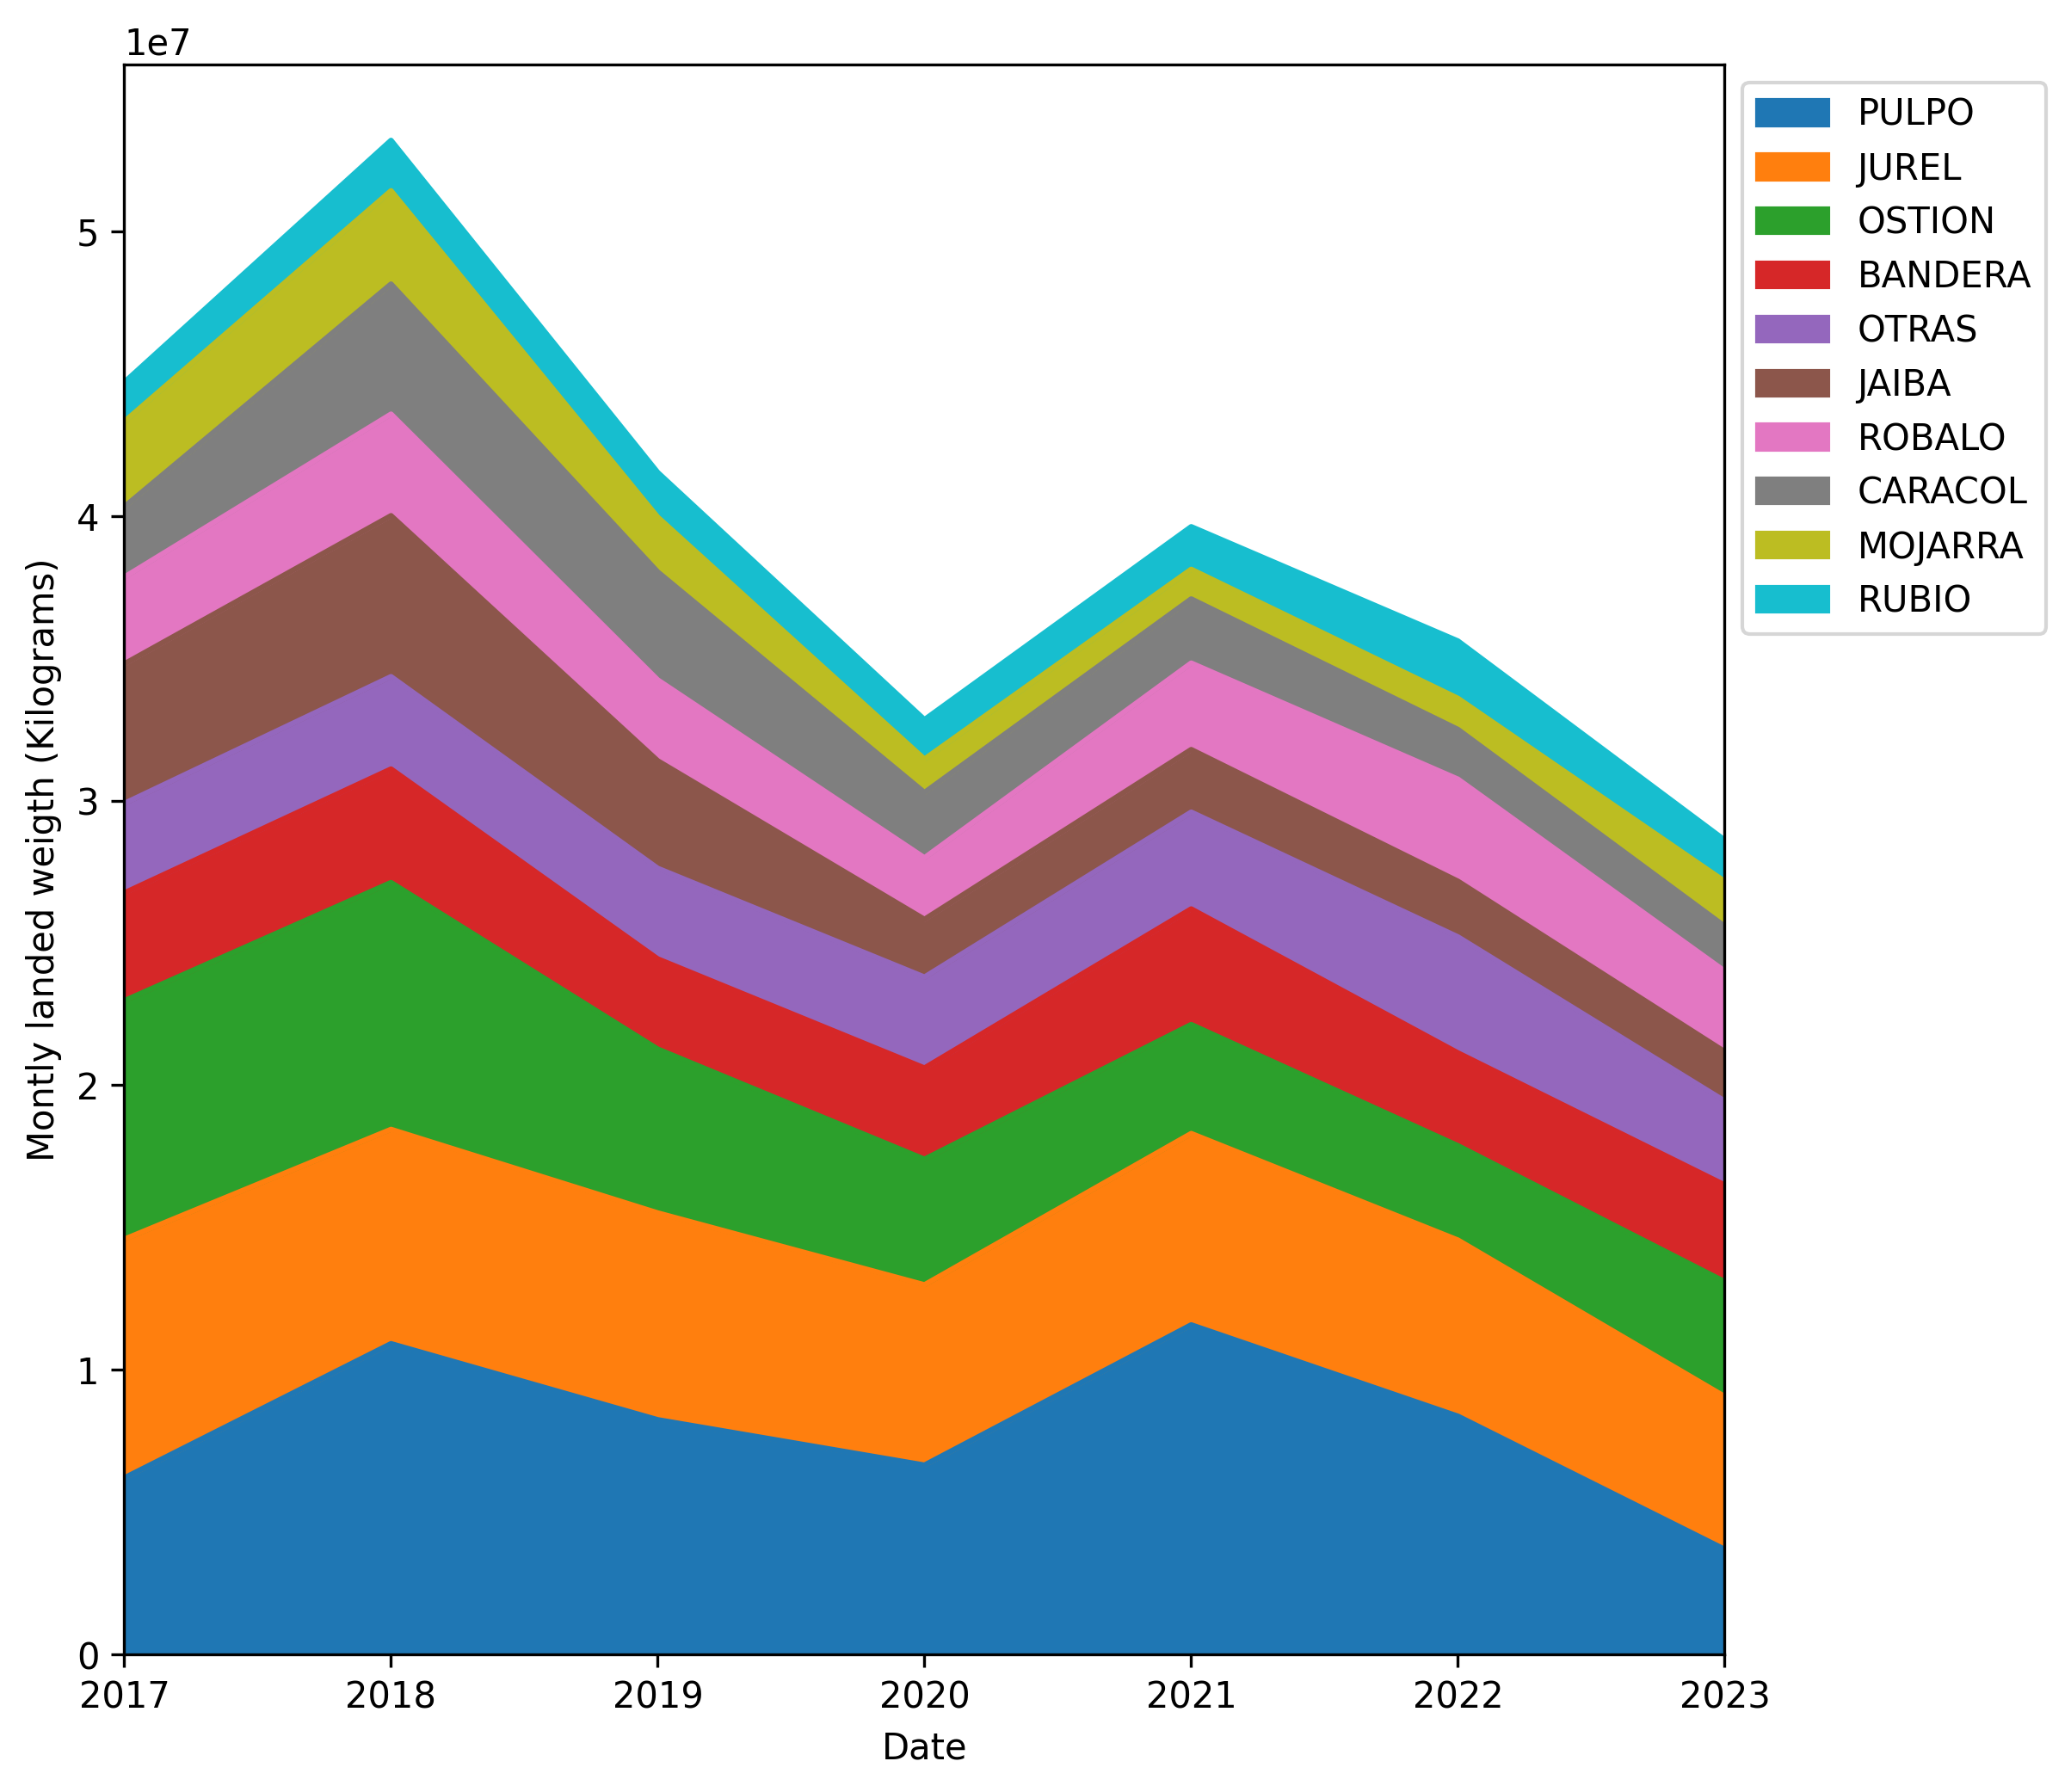

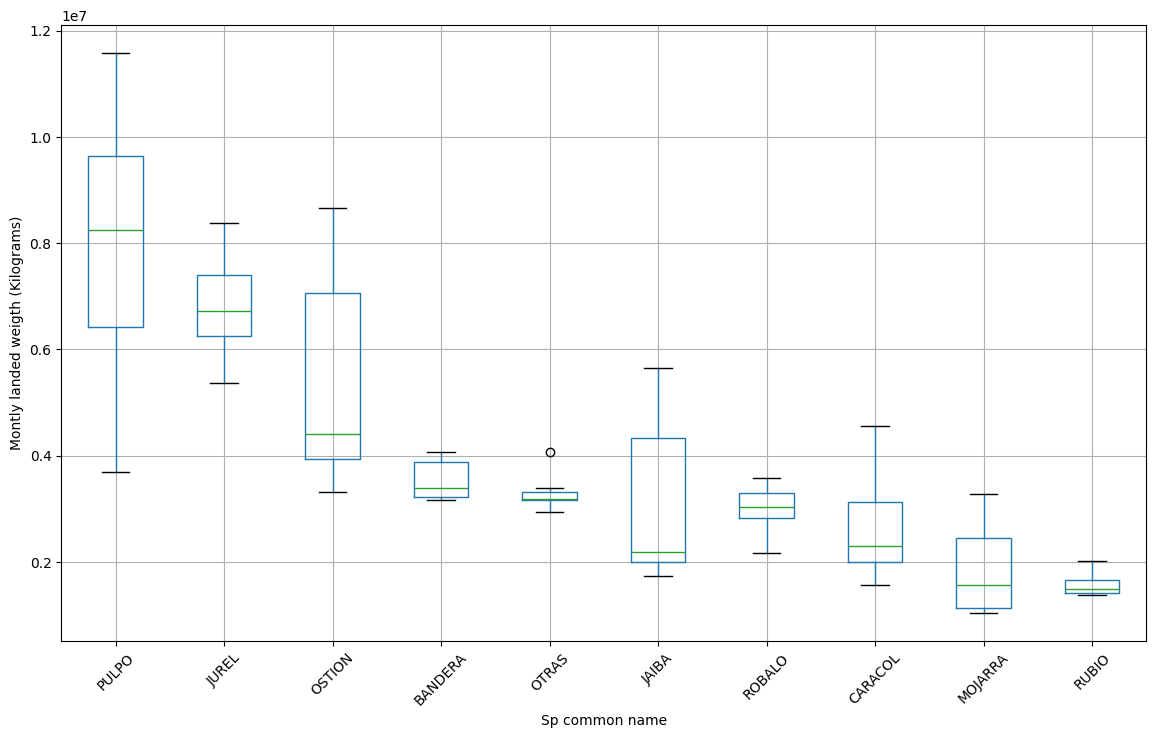

In [10]:
# 4. Series de tiempo de las 10 PRINCIPALs en PESO DESEMBARCADO_KILOGRAMOS
# Filtrar datos para las PRINCIPALs top 10 por volumen
top_10_species_df = df[df['NOMBRE PRINCIPAL'].isin(top_10_by_volume.index)]

# Agrupar por año, mes y especie para obtener los datos mensuales
monthly_df = top_10_species_df.groupby([pd.Grouper(key='FECHA AVISO', freq='YE'), 'NOMBRE PRINCIPAL'])['PESO DESEMBARCADO_KILOGRAMOS'].sum().unstack().fillna(0)

# Ordenar las columnas según el total de captura
ordered_columns = monthly_df.sum().sort_values(ascending=False).index
monthly_df = monthly_df[ordered_columns]

# Graficar las series de tiempo mensuales con áreas apiladas
plt.figure(figsize=(8, 8),dpi=300)
monthly_df.plot.area(ax=plt.gca(), stacked=True)
#plt.title('Series de tiempo mensuales de las 10 especies principales por volumen de captura')
plt.xlabel('Date')
plt.ylabel('Montly landed weigth (Kilograms)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
# Crear un boxplot con las capturas de cada año para las 10 especies principales
plt.figure(figsize=(14, 8))
monthly_df.boxplot()
#plt.title('Boxplot de capturas mensuales de las 10 especies principales por volumen de captura')
plt.xlabel('Sp common name')
plt.ylabel('Montly landed weigth (Kilograms)')
plt.xticks(rotation=45)
plt.show()

Top 10 especies por valor de captura (Valor (MXN)):
NOMBRE PRINCIPAL
PULPO          3.256324e+09
ROBALO         1.552396e+09
OTRAS          7.419531e+08
GUACHINANGO    5.731435e+08
JUREL          4.599397e+08
MOJARRA        4.421928e+08
BANDERA        3.268515e+08
JAIBA          3.200951e+08
CARACOL        2.803318e+08
CAMARON        2.381236e+08
Name: Valor (MXN), dtype: float64

Frecuencia con que se reporta cada especie del top 10 por valor:
NOMBRE PRINCIPAL
JUREL          70568
ROBALO         69010
PULPO          65904
OTRAS          65216
MOJARRA        32155
BANDERA        25655
GUACHINANGO    18187
JAIBA          14541
CARACOL         8612
CAMARON         7507
Name: count, dtype: int64


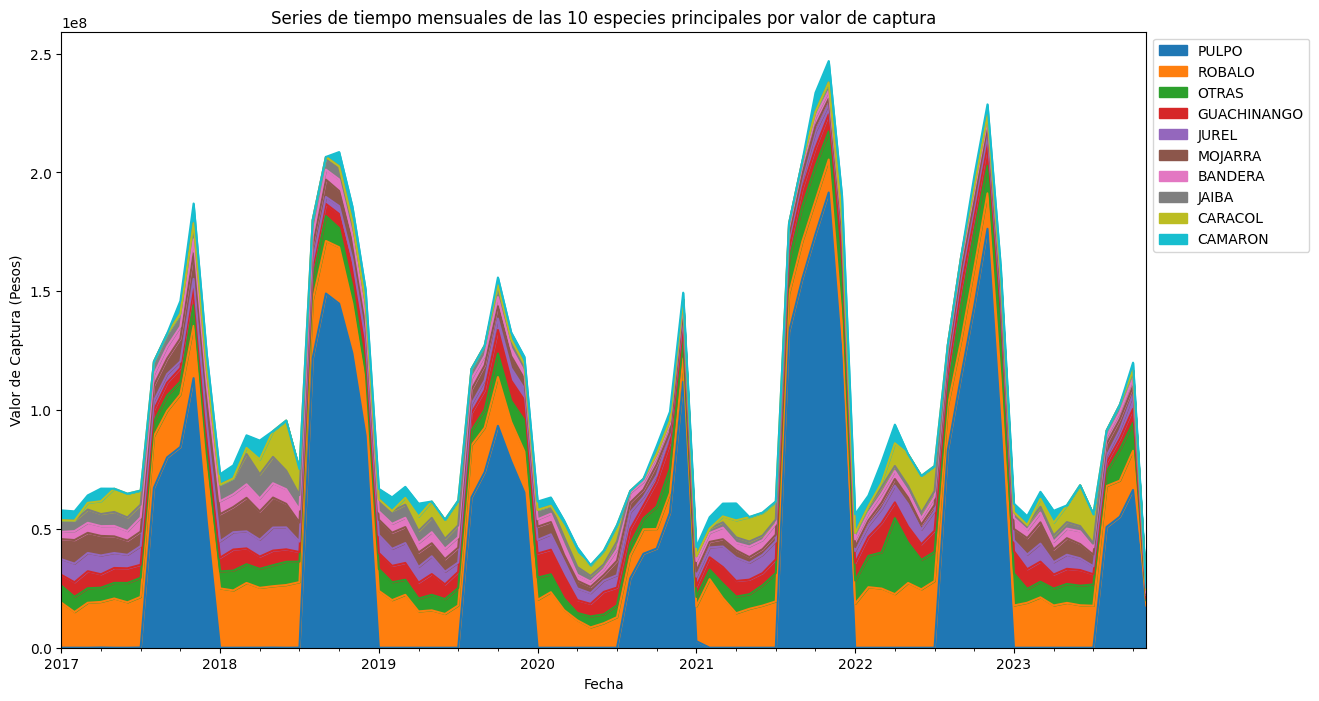

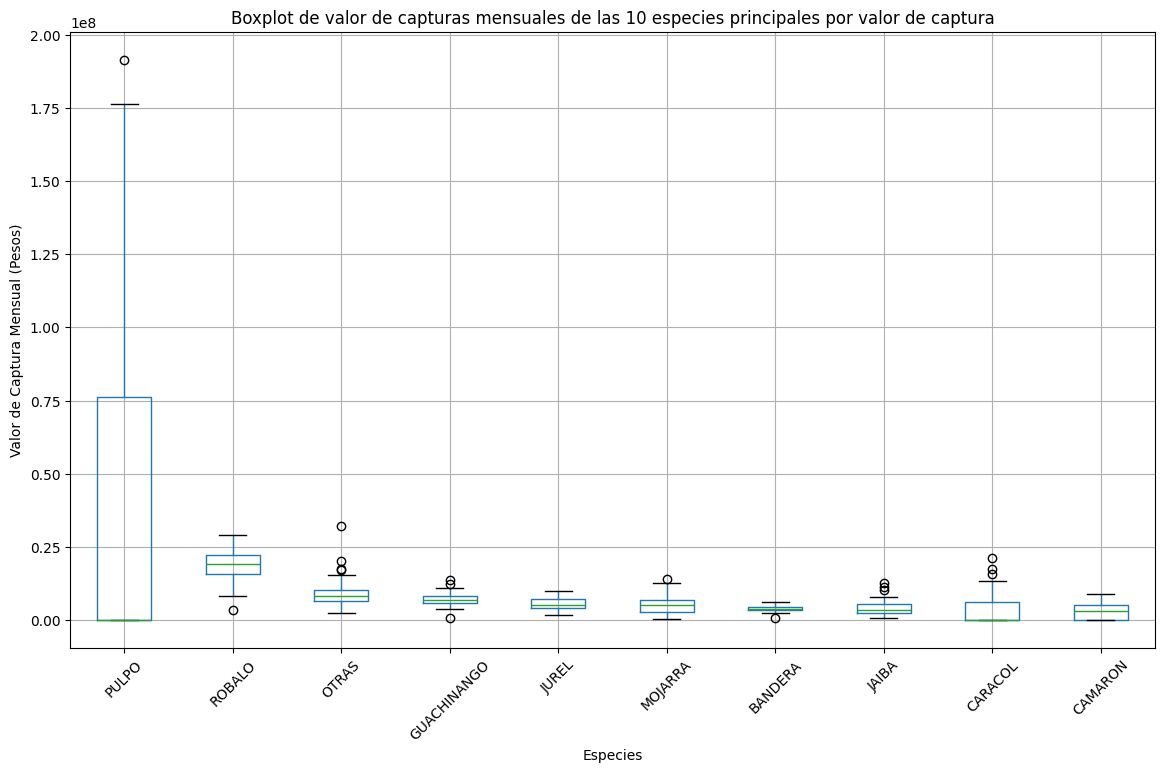

In [11]:

# 1. Identificar el top 10 de NOMBRE PRINCIPAL por su valor de captura en Valor (MXN)
top_10_by_value = df.groupby('NOMBRE PRINCIPAL')['Valor (MXN)'].sum().nlargest(10)
print("Top 10 especies por valor de captura (Valor (MXN)):")
print(top_10_by_value)

# 2. Identificar la frecuencia con que se reporta cada NOMBRE PRINCIPAL del top 10 por valor
frequency_top_10_value = df[df['NOMBRE PRINCIPAL'].isin(top_10_by_value.index)]['NOMBRE PRINCIPAL'].value_counts()
print("\nFrecuencia con que se reporta cada especie del top 10 por valor:")
print(frequency_top_10_value)

# 3. Series de tiempo de las 10 especies en Valor (MXN)
# Filtrar datos para las especies top 10 por valor
top_10_species_df = df[df['NOMBRE PRINCIPAL'].isin(top_10_by_value.index)]

# Agrupar por año, mes y especie para obtener los datos mensuales
monthly_value_df = top_10_species_df.groupby([pd.Grouper(key='FECHA AVISO', freq='ME'), 'NOMBRE PRINCIPAL'])['Valor (MXN)'].sum().unstack().fillna(0)

# Ordenar las columnas según el total del valor de captura
ordered_columns = monthly_value_df.sum().sort_values(ascending=False).index
monthly_value_df = monthly_value_df[ordered_columns]

# Graficar las series de tiempo mensuales con áreas apiladas para el valor de la captura
plt.figure(figsize=(14, 8))
monthly_value_df.plot.area(ax=plt.gca(), stacked=True)
plt.title('Series de tiempo mensuales de las 10 especies principales por valor de captura')
plt.xlabel('Fecha')
plt.ylabel('Valor de Captura (Pesos)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Crear un boxplot con las capturas de cada año para las 10 especies principales por valor
plt.figure(figsize=(14, 8))
monthly_value_df.boxplot()
plt.title('Boxplot de valor de capturas mensuales de las 10 especies principales por valor de captura')
plt.xlabel('Especies')
plt.ylabel('Valor de Captura Mensual (Pesos)')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Calcular el total de captura, valor y frecuencia
total_capture = df['PESO DESEMBARCADO_KILOGRAMOS'].sum()
total_value = df['Valor (MXN)'].sum()
total_frequency = df.shape[0]

# Agrupar los datos por NOMBRE PRINCIPAL y calcular los totales por cada grupo
grouped_df = df.groupby('NOMBRE PRINCIPAL').agg({
    'PESO DESEMBARCADO_KILOGRAMOS': 'sum',
    'Valor (MXN)': 'sum',
    'NOMBRE PRINCIPAL': 'count'
}).rename(columns={'NOMBRE PRINCIPAL': 'FREQUENCY'})

# Calcular los porcentajes
grouped_df['PCT_CAPTURE'] = (grouped_df['PESO DESEMBARCADO_KILOGRAMOS'] / total_capture) * 100
grouped_df['PCT_VALUE'] = (grouped_df['Valor (MXN)'] / total_value) * 100
grouped_df['PCT_FREQUENCY'] = (grouped_df['FREQUENCY'] / total_frequency) * 100

# Calcular el IIR
grouped_df['IIR'] = (grouped_df['PCT_CAPTURE'] + grouped_df['PCT_VALUE'] + grouped_df['PCT_FREQUENCY']) / 300

# Ordenar los datos por IIR descendente
grouped_df = grouped_df.sort_values(by='IIR', ascending=False)

# Seleccionar columnas relevantes para mostrar
result = grouped_df[['PESO DESEMBARCADO_KILOGRAMOS', 'Valor (MXN)', 'FREQUENCY', 'IIR']]


print(result['IIR'].nlargest(10))

NOMBRE PRINCIPAL
PULPO          0.189183
ROBALO         0.105325
JUREL          0.095081
OTRAS          0.079250
BANDERA        0.046383
MOJARRA        0.042991
RUBIO          0.040341
OSTION         0.039209
JAIBA          0.037900
GUACHINANGO    0.035289
Name: IIR, dtype: float64


In [13]:
# Agrupar los datos por UNIDAD ECONOMICA y AÑO y calcular la suma del valor de la captura
grouped_df = df.groupby(['UNIDAD ECONOMICA', 'AÑO'])['Valor (MXN)'].sum().reset_index()

# Calcular el promedio del valor de la captura para cada UNIDAD ECONOMICA por año
average_earnings_per_year = grouped_df.groupby(['UNIDAD ECONOMICA', 'AÑO'])['Valor (MXN)'].mean().reset_index()

# Renombrar la columna para mayor claridad
average_earnings_per_year = average_earnings_per_year.rename(columns={'Valor (MXN)': 'AVERAGE_EARNINGS'})

# Mostrar los resultados
print(average_earnings_per_year)


                        UNIDAD ECONOMICA   AÑO  AVERAGE_EARNINGS
0             BARRA CIEGA SC DE RL DE CV  2017         3074177.0
1      JUAN JOSE DEL CARMEN PACHECO CHAB  2017          234983.0
2      JUAN JOSE DEL CARMEN PACHECO CHAB  2018          128996.0
3      JUAN JOSE DEL CARMEN PACHECO CHAB  2019          111322.0
4      JUAN JOSE DEL CARMEN PACHECO CHAB  2020           49905.0
...                                  ...   ...               ...
8614  ZAIDA DE LOS ANGELES MENDEZ GAMBOA  2018           70237.0
8615  ZAIDA DE LOS ANGELES MENDEZ GAMBOA  2019           33488.0
8616  ZAIDA DE LOS ANGELES MENDEZ GAMBOA  2020            5060.0
8617  ZAIDA DE LOS ANGELES MENDEZ GAMBOA  2021           10290.0
8618  ZAIDA DE LOS ANGELES MENDEZ GAMBOA  2023           82373.0

[8619 rows x 3 columns]


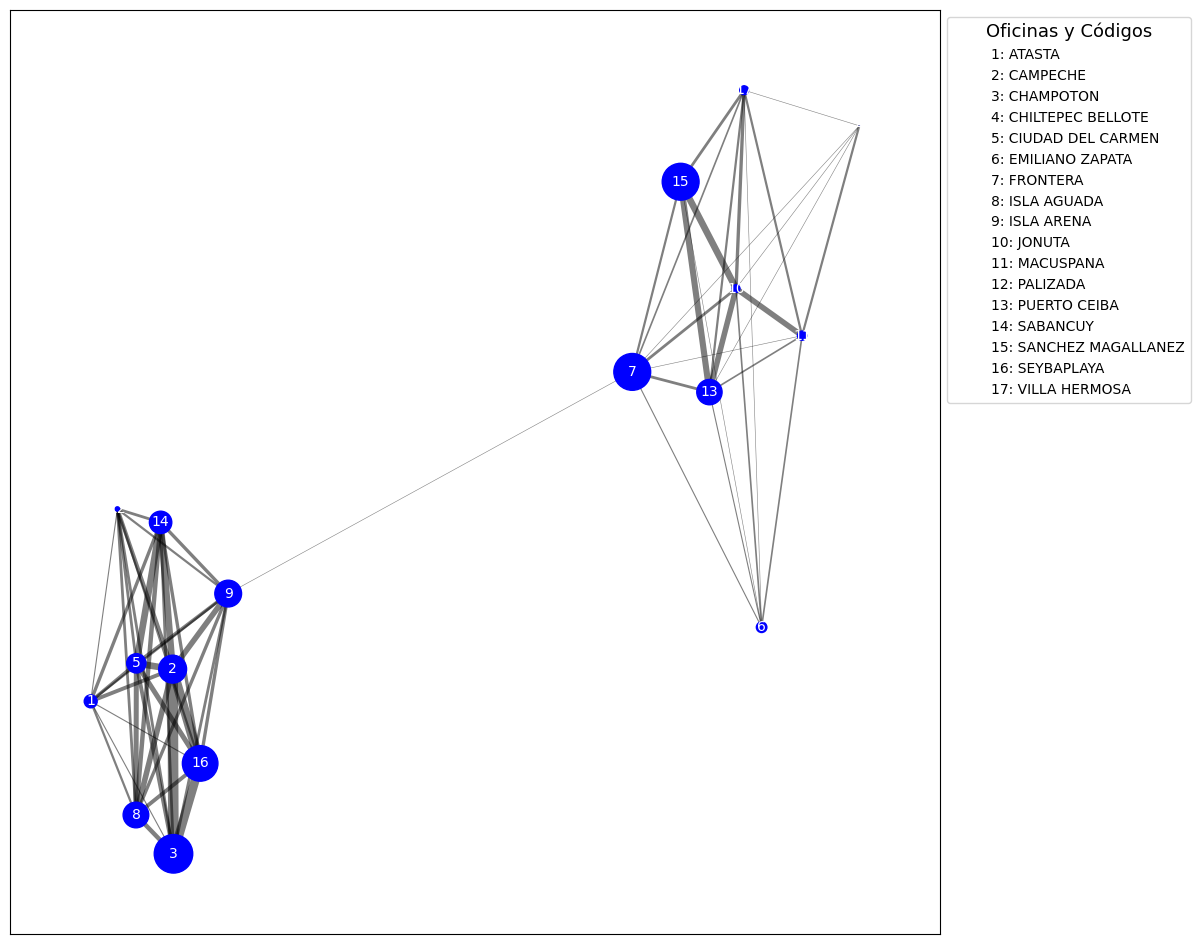

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
file_path = 'TABASCO_CAMPECHE_fishing_reports.csv'  # Cambia esto por la ruta real del archivo
df = pd.read_csv(file_path)
df['NOMBRE OFICINA'] = df['NOMBRE OFICINA'].replace('SANCHEZ MAGALLANES', 'SANCHEZ MAGALLANEZ')


# Agrupar los datos por "Nombre Oficina" y "Nombre Sitio Desembarque"
grouped_df = df.groupby(['NOMBRE OFICINA', 'NOMBRE SITIO DESEMBARQUE']).agg({
    'PESO DESEMBARCADO_KILOGRAMOS': 'sum',
    'NOMBRE SITIO DESEMBARQUE': 'count'
}).rename(columns={'NOMBRE SITIO DESEMBARQUE': 'FRECUENCIA'}).reset_index()

# Calcular el peso total desembarcado por todas las oficinas
total_peso_desembarcado = grouped_df['PESO DESEMBARCADO_KILOGRAMOS'].sum()

# Crear un grafo
G = nx.Graph()

# Crear un diccionario para asignar un código numérico a cada oficina
office_codes = {office: i for i, office in enumerate(grouped_df['NOMBRE OFICINA'].unique(), 1)}

# Añadir nodos con el porcentaje de peso desembarcado como atributo
for oficina in grouped_df['NOMBRE OFICINA'].unique():
    oficina_peso = grouped_df[grouped_df['NOMBRE OFICINA'] == oficina]['PESO DESEMBARCADO_KILOGRAMOS'].sum()
    porcentaje_peso = (oficina_peso / total_peso_desembarcado) * 100
    G.add_node(oficina, size=porcentaje_peso, label=office_codes[oficina])

# Añadir enlaces entre nodos
for sitio, data in grouped_df.groupby('NOMBRE SITIO DESEMBARQUE'):
    oficinas = data['NOMBRE OFICINA'].values
    for i in range(len(oficinas)):
        for j in range(i + 1, len(oficinas)):
            if G.has_edge(oficinas[i], oficinas[j]):
                G[oficinas[i]][oficinas[j]]['weight'] += 1
            else:
                G.add_edge(oficinas[i], oficinas[j], weight=1)

# Extraer el tamaño de los nodos y crear un mapa de tamaños
sizes = [G.nodes[node]['size'] for node in G.nodes()]

# Dibujar el grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=[size * 50 for size in sizes], node_color='blue', alpha=1)
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight']*0.4 for u, v in G.edges()], alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_color='white', font_size=10, font_family='sans-serif')

# Crear la leyenda como un cuadro de texto
# Crear la leyenda
legend_elements = [plt.Line2D([0], [0], color='w', label=f'{code}: {oficina}', markersize=10, markerfacecolor='blue') for oficina, code in office_codes.items()]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title='Oficinas y Códigos', title_fontsize='13')

#plt.title('Análisis de Redes de Oficinas de Pesca')
plt.show()

In [2]:
# Agrupar los datos por "Nombre Principal" para calcular los totales y el precio promedio
species_summary = df.groupby('NOMBRE PRINCIPAL').agg({
    'PESO DESEMBARCADO_KILOGRAMOS': 'sum',
    'PRECIO_PESOS': 'mean',
    'NOMBRE PRINCIPAL': 'count'
}).rename(columns={
    'PESO DESEMBARCADO_KILOGRAMOS': 'Total Peso Desembarcado (KG)',
    'PRECIO_PESOS': 'Precio Promedio (MXN)',
    'NOMBRE PRINCIPAL': 'Frecuencia de Registro'
}).reset_index()


In [3]:
species_summary

,NOMBRE PRINCIPAL,Total Peso Desembarcado (KG),Precio Promedio (MXN),Frecuencia de Registro
0,ALMEJA,1400.00,10.000000,3
1,ANCHOVETA,151421.00,11.715084,537
2,ATUN,1264.00,42.000000,6
3,BAGRE,1280925.00,8.713076,1889
4,BANDERA,24874451.18,13.074258,25662
5,BAQUETA,2907.00,19.833333,6
6,BARRILETE,2900.00,8.500000,4
7,BERRUGATA,443309.00,9.528873,1420
8,BESUGO,4756864.00,35.472716,7834
9,BONITO,9158950.00,9.659585,11649


C:\Users\ricar\AppData\Local\Temp\ipykernel_20948\3575047195.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(cluster / (species_summary['Cluster'].max())), label=f'Cluster {cluster}')


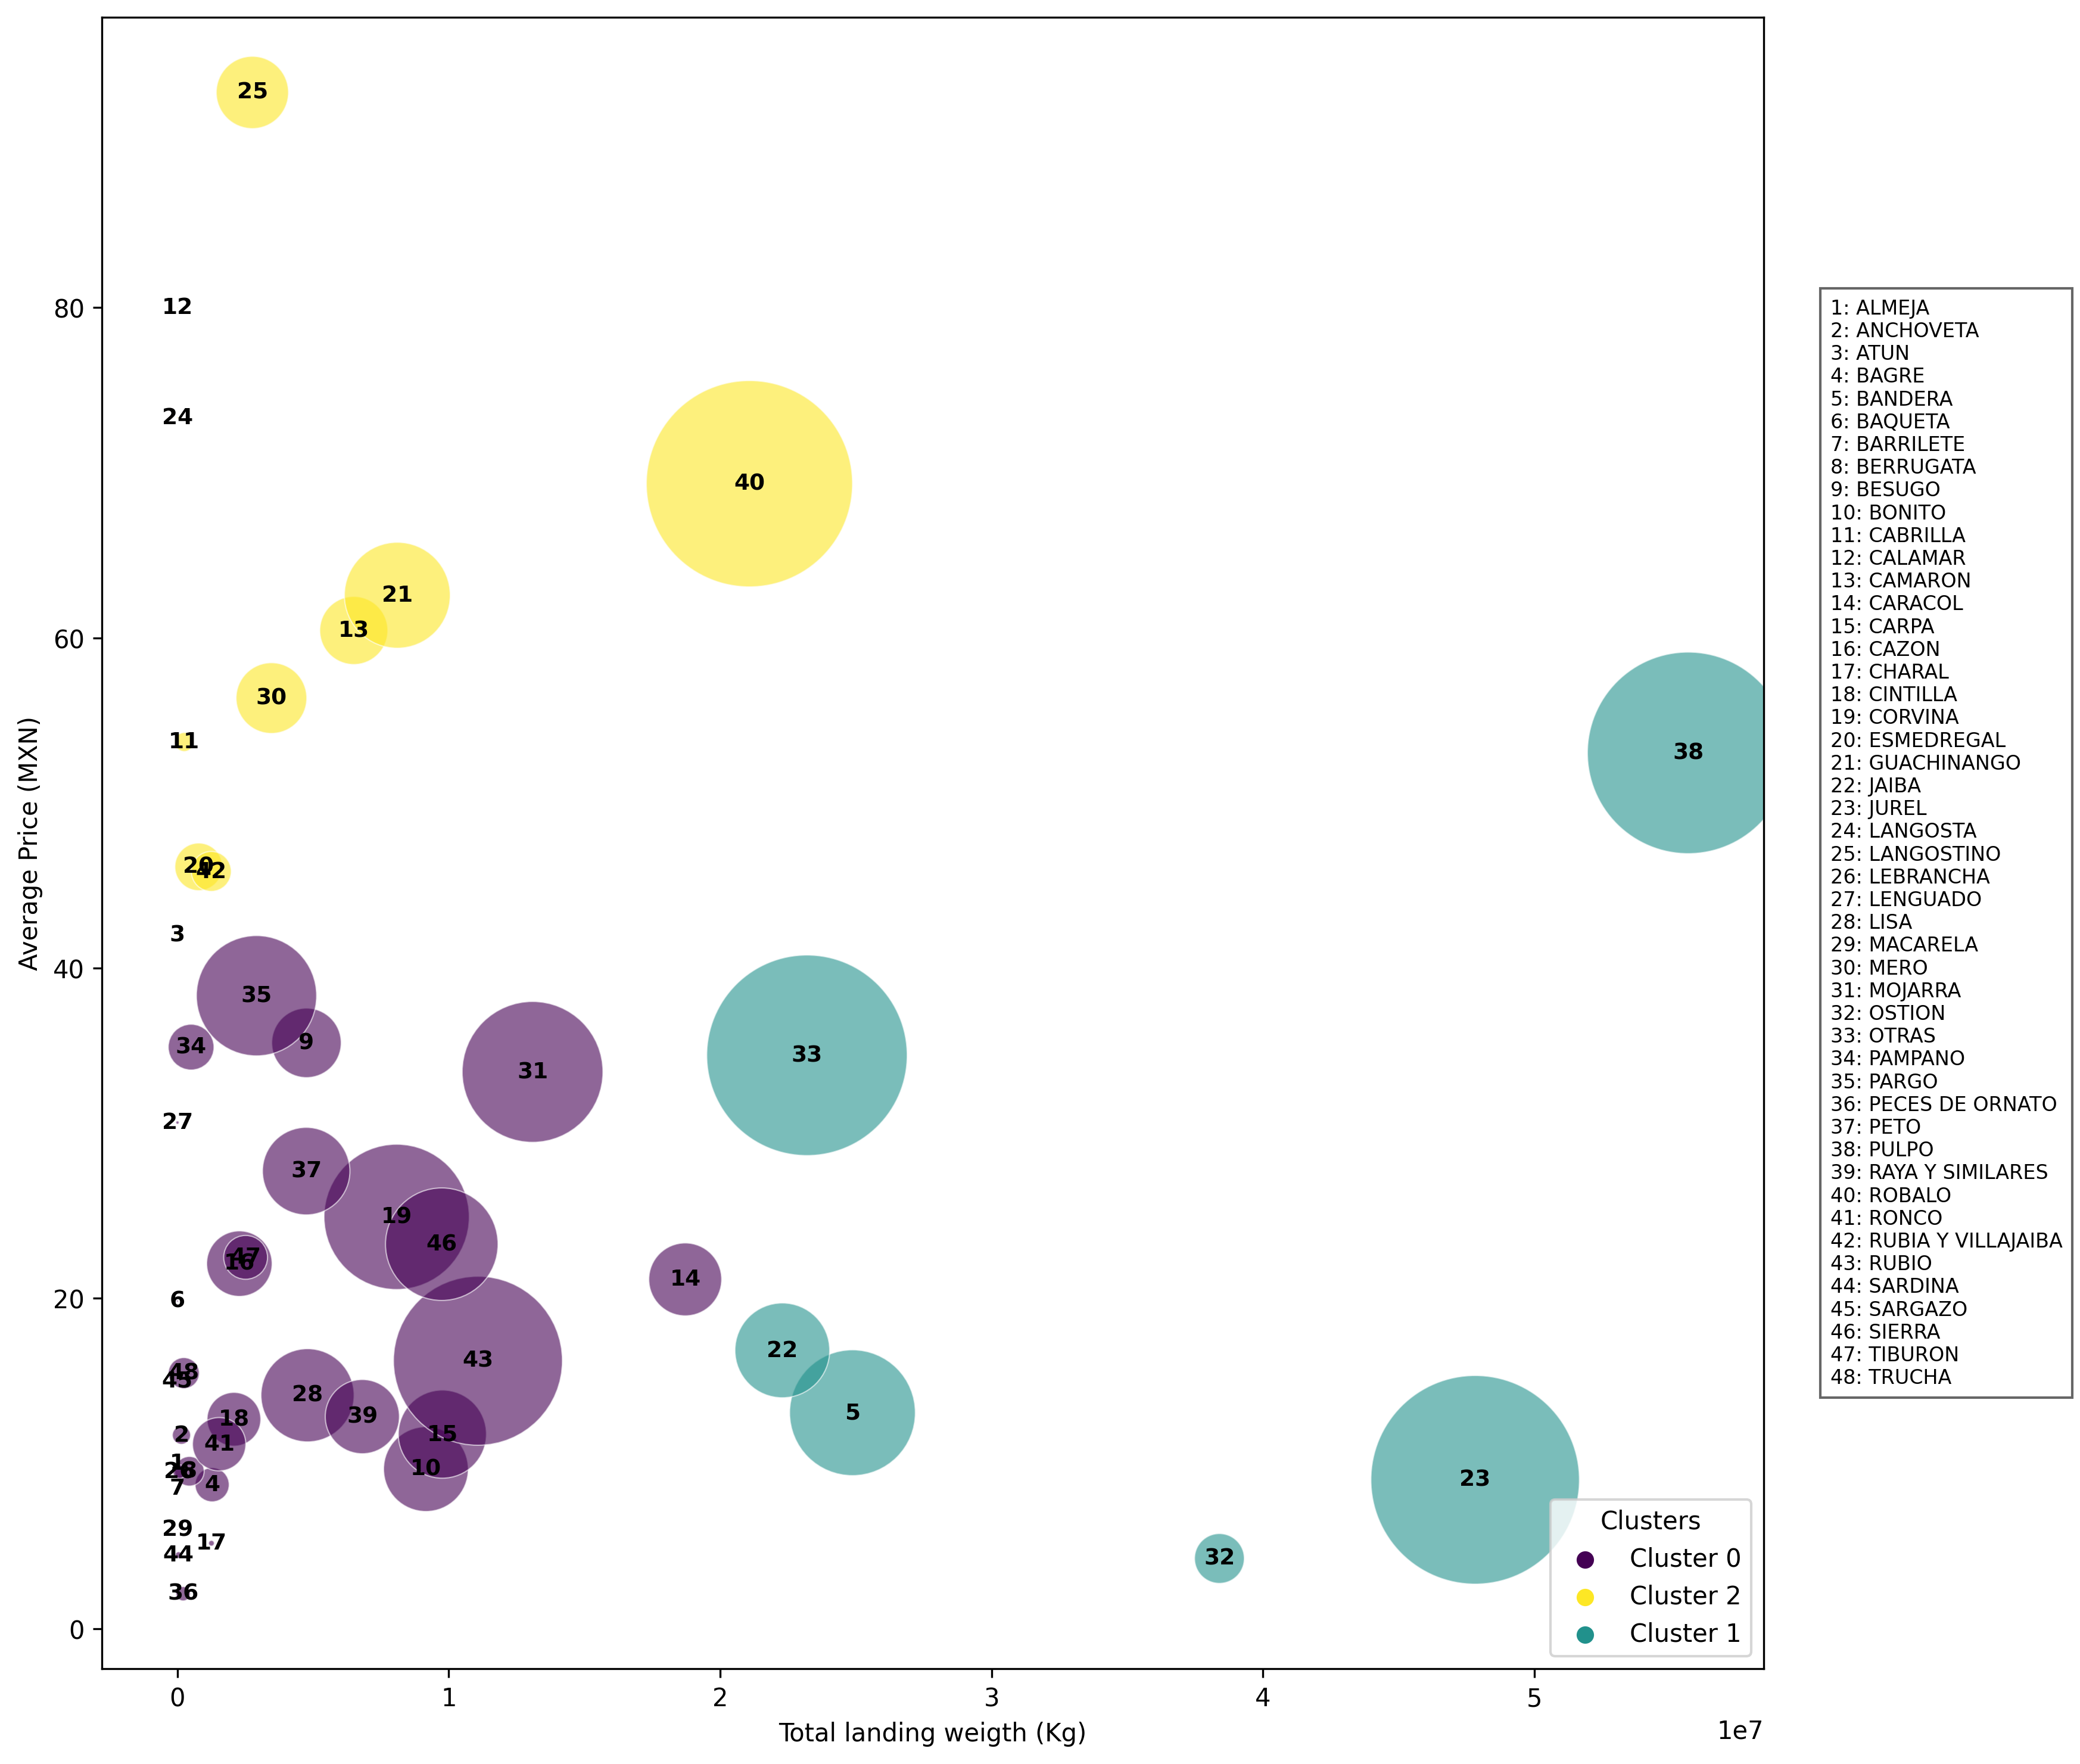

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Agrupar los datos por "Nombre Principal" para calcular los totales y el precio promedio
species_summary = df.groupby('NOMBRE PRINCIPAL').agg({
    'PESO DESEMBARCADO_KILOGRAMOS': 'sum',
    'PRECIO_PESOS': 'mean',
    'NOMBRE PRINCIPAL': 'count'
}).rename(columns={
    'PESO DESEMBARCADO_KILOGRAMOS': 'Total Peso Desembarcado (KG)',
    'PRECIO_PESOS': 'Precio Promedio (MXN)',
    'NOMBRE PRINCIPAL': 'Frecuencia de Registro'
}).reset_index()

# Asignar un código numérico a cada especie
species_codes = {species: i for i, species in enumerate(species_summary['NOMBRE PRINCIPAL'], 1)}
species_summary['Código'] = species_summary['NOMBRE PRINCIPAL'].map(species_codes)

# Realizar el análisis de clustering
X = species_summary[['Total Peso Desembarcado (KG)', 'Precio Promedio (MXN)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
species_summary['Cluster'] = kmeans.fit_predict(X_scaled)

# Crear la gráfica de dispersión
plt.figure(figsize=(12, 12),dpi=300)
scatter = plt.scatter(
    species_summary['Total Peso Desembarcado (KG)'],
    species_summary['Precio Promedio (MXN)'],
    c=species_summary['Cluster'],
    cmap='viridis',
    s=species_summary['Frecuencia de Registro'] /10,  # Ajustar el tamaño de los puntos según la frecuencia
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Añadir los códigos numéricos como etiquetas
for i, row in species_summary.iterrows():
    plt.text(row['Total Peso Desembarcado (KG)'], row['Precio Promedio (MXN)'], str(row['Código']),
             fontsize=9, ha='center', va='center', color='black', fontweight='bold')

# Añadir leyenda de los clusters
for cluster in species_summary['Cluster'].unique():
    plt.scatter([], [], c=scatter.cmap(cluster / (species_summary['Cluster'].max())), label=f'Cluster {cluster}')
plt.legend(title="Clusters", loc="lower right")

# Añadir la lista de especies con sus códigos como leyenda
legend_text = "\n".join([f"{code}: {species}" for species, code in species_codes.items()])
plt.gca().text(1.04, 0.5, legend_text, transform=plt.gca().transAxes, fontsize=8, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.6))

# Añadir etiquetas y título
plt.xlabel('Total landing weigth (Kg)')
plt.ylabel('Average Price (MXN)')
#plt.title('Dispersión de Captura vs Precio con Tamaño de Frecuencia e Identificación de Clusters')
plt.show()

C:\Users\ricar\AppData\Local\Temp\ipykernel_20948\1388241877.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(cluster / (economic_unit_summary['Cluster'].max())), label=f'Cluster {cluster}')


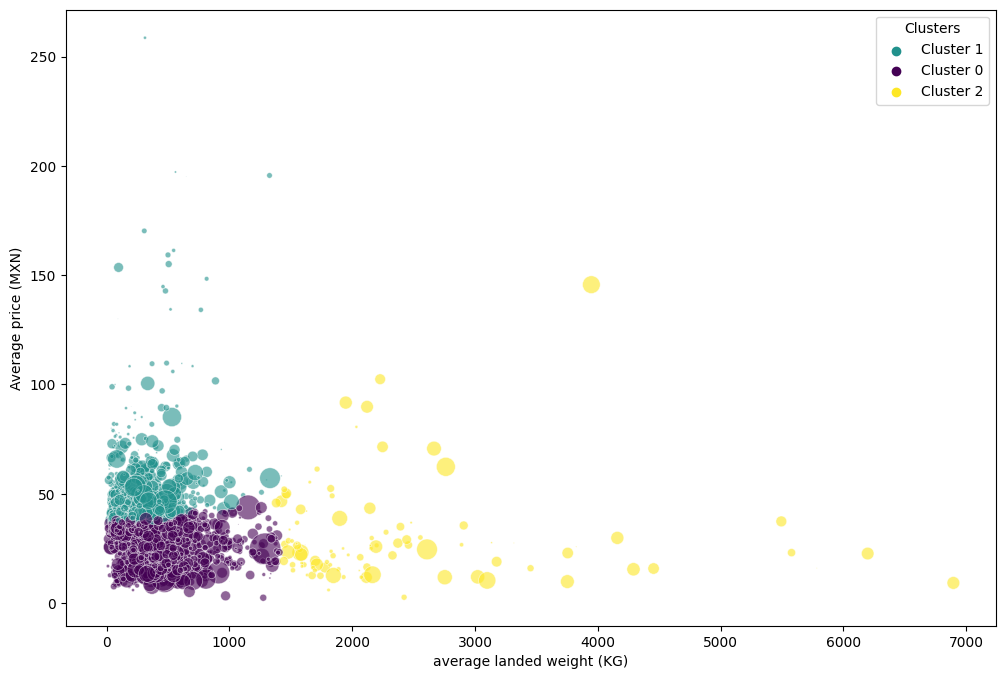

In [13]:
# Agrupar los datos por "RNPA Unidad Económica" para calcular los promedios
economic_unit_summary = df.groupby('RNPA UNIDAD ECONOMICA').agg({
    'PESO DESEMBARCADO_KILOGRAMOS': 'mean',
    'PRECIO_PESOS': 'mean',
    'NOMBRE PRINCIPAL': 'count'
}).rename(columns={
    'PESO DESEMBARCADO_KILOGRAMOS': 'Promedio Peso Desembarcado (KG)',
    'PRECIO_PESOS': 'Promedio Precio (MXN)',
    'NOMBRE PRINCIPAL': 'Frecuencia de Arribo'
}).reset_index()

# Realizar el análisis de clustering
X = economic_unit_summary[['Promedio Peso Desembarcado (KG)', 'Promedio Precio (MXN)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
economic_unit_summary['Cluster'] = kmeans.fit_predict(X_scaled)

# Crear la gráfica de dispersión
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    economic_unit_summary['Promedio Peso Desembarcado (KG)'],
    economic_unit_summary['Promedio Precio (MXN)'],
    c=economic_unit_summary['Cluster'],
    cmap='viridis',
    s=economic_unit_summary['Frecuencia de Arribo'] / 10,  # Ajustar el tamaño de los puntos según la frecuencia
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Añadir leyenda de los clusters
for cluster in economic_unit_summary['Cluster'].unique():
    plt.scatter([], [], c=scatter.cmap(cluster / (economic_unit_summary['Cluster'].max())), label=f'Cluster {cluster}')
plt.legend(title="Clusters", loc="upper right")

# Añadir etiquetas y título
plt.xlabel('average landed weight (KG)')
plt.ylabel('Average price (MXN)')
#plt.title('Dispersión de Peso vs Precio con Frecuencia de Arribo e Identificación de Clusters')
plt.show()

In [15]:
# Agrupar los datos por "RNPA Unidad Económica" para calcular los promedios y otras estadísticas descriptivas
economic_unit_summary = df.groupby('RNPA UNIDAD ECONOMICA').agg({
    'PESO DESEMBARCADO_KILOGRAMOS': ['mean', 'std', 'min', 'max', 'median'],
    'PRECIO_PESOS': ['mean', 'std', 'min', 'max', 'median'],
    'NOMBRE PRINCIPAL': 'count'
}).rename(columns={
    'mean': 'Promedio',
    'std': 'Desviación Estándar',
    'min': 'Mínimo',
    'max': 'Máximo',
    'median': 'Mediana',
    'count': 'Frecuencia de Arribo'
}).reset_index()

# Aplanar columnas multi-nivel
economic_unit_summary.columns = ['_'.join(col).strip() for col in economic_unit_summary.columns.values]


In [16]:
economic_unit_summary

,RNPA UNIDAD ECONOMICA_,PESO DESEMBARCADO_KILOGRAMOS_Promedio,PESO DESEMBARCADO_KILOGRAMOS_Desviación Estándar,PESO DESEMBARCADO_KILOGRAMOS_Mínimo,PESO DESEMBARCADO_KILOGRAMOS_Máximo,PESO DESEMBARCADO_KILOGRAMOS_Mediana,PRECIO_PESOS_Promedio,PRECIO_PESOS_Desviación Estándar,PRECIO_PESOS_Mínimo,PRECIO_PESOS_Máximo,PRECIO_PESOS_Mediana,NOMBRE PRINCIPAL_Frecuencia de Arribo
0,4.010003e+08,478.330508,517.511186,20.0,3120.0,300.0,62.513559,82.865975,6.0,550.0,35.0,590
1,4.010009e+08,104.309593,70.918029,2.0,500.0,90.0,50.654070,30.448651,8.0,120.0,45.0,688
2,4.010014e+08,317.078818,548.247084,10.0,3500.0,140.0,38.037438,29.191312,5.0,120.0,30.0,1015
3,4.010014e+08,82.000000,59.305504,30.0,200.0,50.0,46.933333,28.656754,10.0,110.0,45.0,15
4,4.010014e+08,133.759804,91.031073,12.0,507.0,112.0,25.857843,12.984052,8.0,50.0,30.0,204
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,2.708005e+09,338.086957,224.896929,36.0,847.0,364.0,16.739130,12.835382,6.0,45.0,10.0,23
1595,2.804001e+09,2034.521739,1236.634910,100.0,5318.0,1949.0,80.608696,34.473486,10.0,110.0,100.0,46
1596,3.105005e+09,429.132911,535.925369,18.0,3300.0,200.0,46.367089,23.633441,1.0,120.0,40.0,158
1597,3.105010e+09,2065.880150,1162.633561,300.0,7500.0,1680.0,20.955056,18.069567,1.5,85.0,15.0,267
